In [1]:
import numpy as np
import pandas as ps
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
import pydot
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import auc, roc_curve,classification_report,confusion_matrix
#from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
cs=ps.read_csv('C:/Users/Yash/Desktop/germancsv.csv')
cs.head()


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Output
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,1,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,0,1,2
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,0,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,0,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,0,1,2


In [4]:
cs.corr()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Output
Status of existing checking account,1.000000,-0.072013,0.192191,0.028783,-0.042705,0.222867,0.106339,-0.005280,0.043261,-0.127737,...,-0.032260,0.059751,0.046841,0.022424,0.076005,0.040663,-0.014145,0.066296,0.026758,-0.350847
Duration in month,-0.072013,1.000000,-0.077186,0.147492,0.624984,0.047661,0.057381,0.074749,0.014789,-0.024490,...,0.303971,-0.036136,-0.054884,0.157049,-0.011284,0.210910,-0.023834,0.164718,0.138196,0.214927
Credit history,0.192191,-0.077186,1.000000,-0.090336,-0.059905,0.039058,0.138225,0.044375,0.042171,-0.040676,...,-0.053777,0.147086,0.121973,0.062095,0.437066,0.010350,0.011550,0.052370,-0.013873,-0.228785
Purpose,0.028783,0.147492,-0.090336,1.000000,0.068474,-0.018684,0.016013,0.048369,0.000157,-0.017607,...,0.010966,0.001312,-0.096612,0.018391,0.054935,0.008085,-0.032577,0.078371,0.099725,0.017979
Credit amount,-0.042705,0.624984,-0.059905,0.068474,1.000000,0.064630,-0.008367,-0.271316,-0.016091,-0.027832,...,0.311599,0.032716,-0.046008,0.135632,0.020795,0.285385,0.017142,0.276995,0.050050,0.154739
Savings account/bonds,0.222867,0.047661,0.039058,-0.018684,0.064630,1.000000,0.120950,0.021993,0.017349,-0.105069,...,0.018948,0.084245,0.001908,0.006505,-0.021644,0.011709,0.027514,0.087208,-0.007095,-0.178943
Present employment since,0.106339,0.057381,0.138225,0.016013,-0.008367,0.120950,1.000000,0.126161,0.111278,-0.008116,...,0.087187,0.256227,-0.040154,0.111126,0.125791,0.101225,0.097192,0.060518,0.027232,-0.116002
Installment rate in percentage of disposable income,-0.005280,0.074749,0.044375,0.048369,-0.271316,0.021993,0.126161,1.000000,0.119308,-0.011398,...,0.053391,0.058266,-0.000983,0.089405,0.021669,0.097755,-0.071207,0.014413,0.090024,0.072404
Personal status and sex,0.043261,0.014789,0.042171,0.000157,-0.016091,0.017349,0.111278,0.119308,1.000000,0.050634,...,-0.006940,0.007783,-0.036765,0.099579,0.064672,-0.011956,0.122165,0.027275,-0.065618,-0.088184
Other debtors / guarantors,-0.127737,-0.024490,-0.040676,-0.017607,-0.027832,-0.105069,-0.008116,-0.011398,0.050634,1.000000,...,-0.155450,-0.029873,-0.059023,-0.065889,-0.025447,-0.057963,0.020400,-0.075035,-0.117999,-0.025137


In [5]:
#Normalization section
col=['Duration in month','Credit amount','Age in years']
cs[col]=cs[col].apply(lambda x: (x-x.min())/(x.max()-x.min()))
cs.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Output
0,1,0.029412,4,3,0.050567,5,5,4,3,1,...,1,0.857143,3,2,2,3,1,1,1,1
1,2,0.647059,2,3,0.313690,1,3,2,2,1,...,1,0.053571,3,2,1,3,1,0,1,2
2,4,0.117647,4,6,0.101574,1,4,2,3,1,...,1,0.535714,3,2,1,2,2,0,1,1
3,1,0.558824,2,2,0.419941,1,4,2,3,3,...,2,0.464286,3,3,1,3,2,0,1,1
4,1,0.294118,3,0,0.254209,1,3,3,3,1,...,4,0.607143,3,3,2,3,2,0,1,2


frauds : 30.0 %
non frauds : 70.0 %


Text(0, 0.5, 'Frequency')

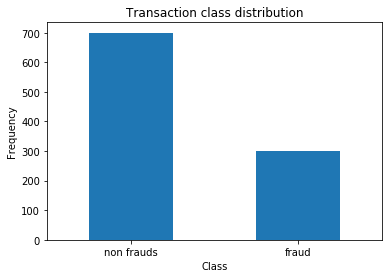

In [6]:
#Data Representation section
All = cs.shape[0]
fraud = cs[cs['Output'] == 2]
nonFraud = cs[cs['Output'] == 1]
a = len(fraud)/All
b = len(nonFraud)/All

print('frauds :',a*100,'%')
print('non frauds :',b*100,'%')
labels = ['non frauds','fraud']
classes = ps.value_counts(cs['Output'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
#Training & Testing data creation
data=np.array(cs)
x=data[ : ,:20]
y=data[:,20]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=10)


In [8]:
#SVM Constructor
svmmodel=SVC(random_state=10,kernel='poly', degree=3, gamma='scale')


#RandomForest Contructor
rfmodel = RandomForestClassifier(n_estimators=1000, random_state=90)

#Naive Bayes Constructor
nbmodel=GaussianNB()

#k-neighbors classifier constructor
knmodel=KNeighborsClassifier()

#LDA constructor
ldamodel=LinearDiscriminantAnalysis()

In [9]:
#SVM Fitting
svmmodel.fit(xtrain,ytrain)


#RandomForest Fitting
rfmodel.fit(xtrain,ytrain)


#Naive Bayes Fitting
nbmodel.fit(xtrain,ytrain)


#k-neighbors classifier Fitting
knmodel.fit(xtrain,ytrain)


#LDA Fitting
ldamodel.fit(xtrain,ytrain)


#joblib.dump(ldamodel, 'ldadump.pk1')

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [10]:
#SVM Prediction
testy=svmmodel.predict(xtest)


#RandomForest Prediction
ypred=rfmodel.predict(xtest)


#Naive Bayes Prediction
predy=nbmodel.predict(xtest)


#k-neighbors classifier Prediction
pred=knmodel.predict(xtest)


#LDA Fitting
pre=ldamodel.predict(xtest)

In [11]:
#SVM Accuracy Score
acc=accuracy_score(testy,ytest)*100
print("SVM Algorithm Accuracy Score:",acc,"%")


#RandomForest Accuracy Score
print("RandomForest Algorithm Accuracy Score:",accuracy_score(ypred,ytest)*100,"%")


#Naive Bayes Accuracy Score
print("Naive-Bayes Algorithm Accuracy Score:",accuracy_score(predy,ytest)*100,"%")


#k-neighbors classifier Accuracy Score
print("K-Neighbors Algorithm Accuracy Score:",accuracy_score(pred,ytest)*100,"%")


#LDA Accuracy Score
print("LDA Algorithm Accuracy Score:",accuracy_score(pre,ytest)*100,"%")

SVM Algorithm Accuracy Score: 75.25 %
RandomForest Algorithm Accuracy Score: 79.5 %
Naive-Bayes Algorithm Accuracy Score: 75.0 %
K-Neighbors Algorithm Accuracy Score: 74.75 %
LDA Algorithm Accuracy Score: 77.0 %


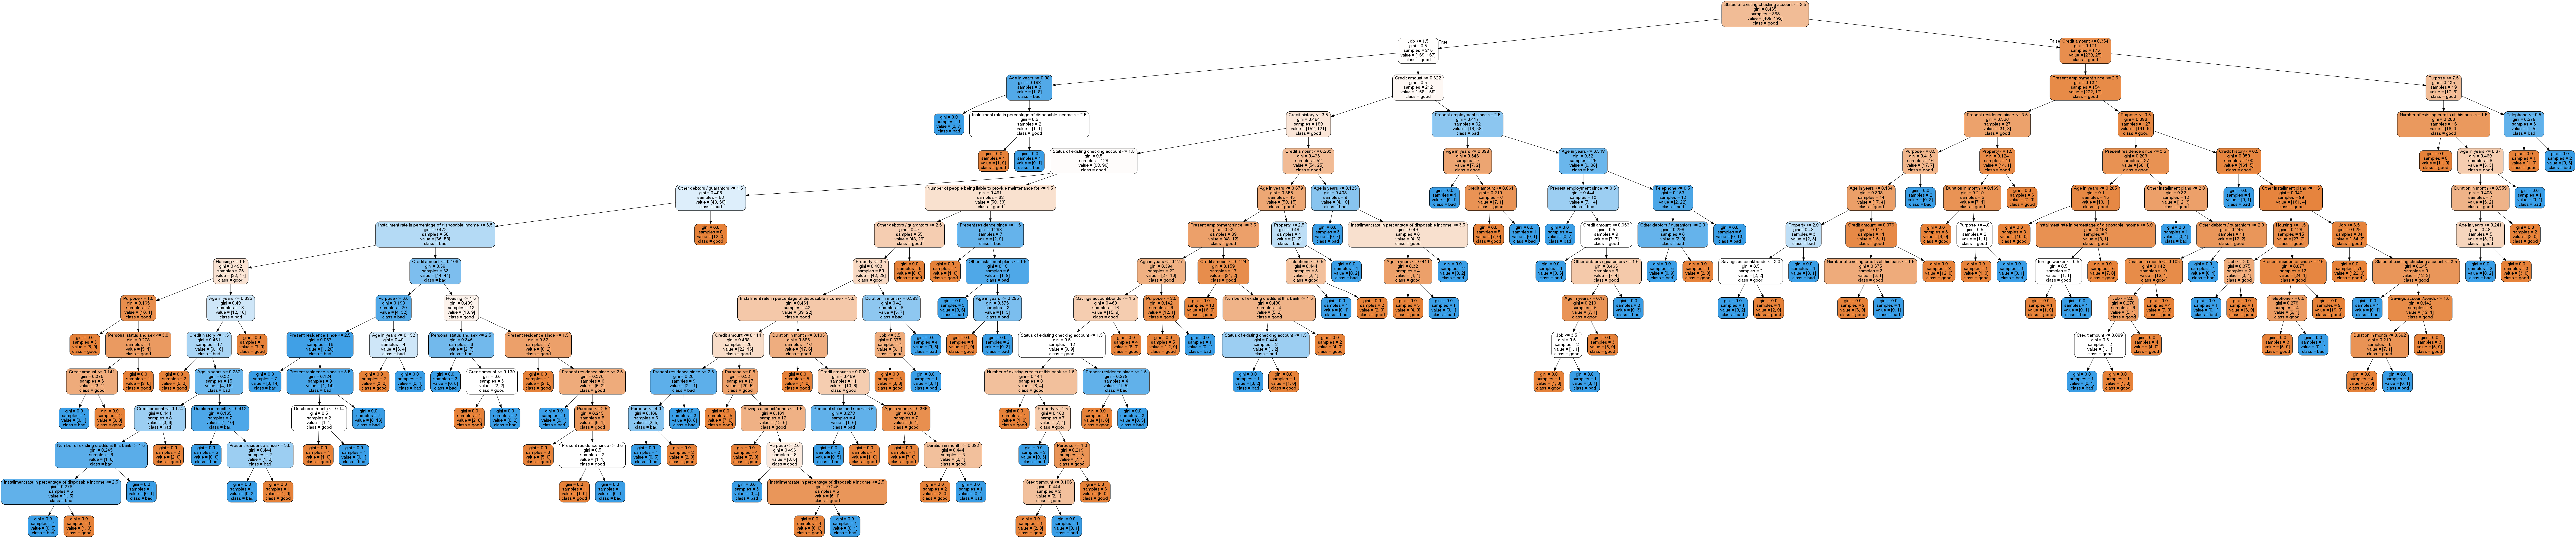

In [12]:
#RandomForest Tree
estimator=rfmodel.estimators_[5]
export_graphviz(estimator, out_file = 'tree1.dot', feature_names = ['Status of existing checking account','Duration in month',
                                                                    'Credit history','Purpose','Credit amount',
                                                                    'Savings account/bonds','Present employment since',
                                                                    'Installment rate in percentage of disposable income',
                                                                    'Personal status and sex','Other debtors / guarantors',
                                                                    'Present residence since','Property','Age in years',
                                                                    'Other installment plans','Housing',
                                                                    'Number of existing credits at this bank','Job',
                                                                    'Number of people being liable to provide maintenance for',
                                                                    'Telephone','foreign worker'],class_names=['good','bad'], 
                rounded = True, precision = 3, filled=True)
(graph,)=pydot.graph_from_dot_file('tree1.dot')
graph.write_png('tree1.png')
from IPython.display import Image
Image(filename='tree1.png')

In [13]:
#RandomForest Classification report
print(classification_report(ytest, ypred, target_names=['good','bad']))

              precision    recall  f1-score   support

        good       0.81      0.92      0.86       281
         bad       0.72      0.50      0.59       119

    accuracy                           0.80       400
   macro avg       0.77      0.71      0.73       400
weighted avg       0.79      0.80      0.78       400



In [13]:
"""
conf_mat = confusion_matrix(ytest, ypred)
print(conf_mat)
sns.heatmap(conf_mat)
plt.show()
"""

'\nconf_mat = confusion_matrix(ytest, ypred)\nprint(conf_mat)\nsns.heatmap(conf_mat)\nplt.show()\n'

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


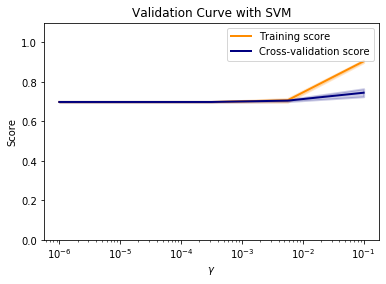

In [14]:
#validation curve SVM
digits = load_digits()
X, Y = xtrain, ytrain
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, Y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [36]:
"""
#learning curve SVM
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
X, y = xtrain, ytrain
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()
"""

'\n#learning curve SVM\ndef plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,\n                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):\n    plt.figure()\n    plt.title(title)\n    plt.figure()\n    plt.title(title)\n    if ylim is not None:\n        plt.ylim(*ylim)\n    plt.xlabel("Training examples")\n    plt.ylabel("Score")\n    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)\n    train_scores_mean = np.mean(train_scores, axis=1)\n    train_scores_std = np.std(train_scores, axis=1)\n    test_scores_mean = np.mean(test_scores, axis=1)\n    test_scores_std = np.std(test_scores, axis=1)\n    plt.grid()\n    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\n                     train_scores_mean + train_scores_std, alpha=0.1,\n                     color="r")\n    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\n                     test_scores_mean

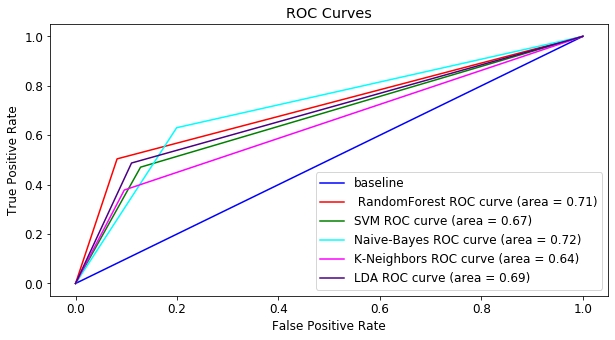

In [15]:
#ROC Curve
base_fpr, base_tpr, _ = roc_curve(ytest, [1 for _ in range(len(ytest))], pos_label=2)
model_fpr, model_tpr, _ = roc_curve(ytest, ypred, pos_label=2)
roc_auc = auc(model_fpr, model_tpr)

model_fpr1, model_tpr1, _ = roc_curve(ytest, testy, pos_label=2)
roc_auc1 = auc(model_fpr1, model_tpr1)

model_fpr2, model_tpr2, _ = roc_curve(ytest, predy, pos_label=2)
roc_auc2 = auc(model_fpr2, model_tpr2)

model_fpr3, model_tpr3, _ = roc_curve(ytest, pred, pos_label=2)
roc_auc3 = auc(model_fpr3, model_tpr3)

model_fpr4, model_tpr4, _ = roc_curve(ytest, pre, pos_label=2)
roc_auc4 = auc(model_fpr4, model_tpr4)

plt.figure(figsize = (10, 5))
plt.rcParams['font.size'] = 12
   
# Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = ' RandomForest ROC curve (area = %0.2f)' % roc_auc)
plt.plot(model_fpr1, model_tpr1, 'g', label = 'SVM ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(model_fpr2, model_tpr2, 'cyan', label = 'Naive-Bayes ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(model_fpr3, model_tpr3, 'magenta', label = 'K-Neighbors ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(model_fpr4, model_tpr4, 'indigo', label = 'LDA ROC curve (area = %0.2f)' % roc_auc4)
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();

print()



In [38]:
"""
regressor_random = RandomForestRegressor(n_estimators=1000, random_state=10)
regressor_random.fit(xtrain,ytrain)
predy=regressor_random.predict(xtest)
errors=abs(predy-ytest)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / ytest)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

tree = regressor_random.estimators_[5]
names=list(cs.columns)
feature_names=np.array(names)
f_names=feature_names[0:20]
t_names=[0,1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = f_names, class_names = ['good','bad'], rounded = True, precision = 2, filled=True)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
"""

"\nregressor_random = RandomForestRegressor(n_estimators=1000, random_state=10)\nregressor_random.fit(xtrain,ytrain)\npredy=regressor_random.predict(xtest)\nerrors=abs(predy-ytest)\nprint('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')\nmape = 100 * (errors / ytest)\naccuracy = 100 - np.mean(mape)\n\nprint('Accuracy:', round(accuracy, 2), '%.')\n\ntree = regressor_random.estimators_[5]\nnames=list(cs.columns)\nfeature_names=np.array(names)\nf_names=feature_names[0:20]\nt_names=[0,1]\nexport_graphviz(tree, out_file = 'tree.dot', feature_names = f_names, class_names = ['good','bad'], rounded = True, precision = 2, filled=True)\n(graph, ) = pydot.graph_from_dot_file('tree.dot')\ngraph.write_png('tree.png')\n"

In [39]:
"""rf_small = RandomForestRegressor(n_estimators=1000, max_depth=3)
rf_small.fit(xtrain, ytrain)
tree_small = rf_small.estimators_[20]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = f_names, class_names = t_names, rounded = True, precision = 2, filled=True)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')
"""

"rf_small = RandomForestRegressor(n_estimators=1000, max_depth=3)\nrf_small.fit(xtrain, ytrain)\ntree_small = rf_small.estimators_[20]\nexport_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = f_names, class_names = t_names, rounded = True, precision = 2, filled=True)\n(graph, ) = pydot.graph_from_dot_file('small_tree.dot')\ngraph.write_png('small_tree.png')\n"

In [16]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [17]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X

array([[-1.25456565, -1.23647786,  1.34401408, ..., -0.42828957,
         1.21459768,  0.19601428],
       [-0.45902624,  2.24819436, -0.50342796, ..., -0.42828957,
        -0.82331789,  0.19601428],
       [ 1.13205258, -0.73866754,  1.34401408, ...,  2.33486893,
        -0.82331789,  0.19601428],
       ...,
       [ 1.13205258, -0.73866754, -0.50342796, ..., -0.42828957,
        -0.82331789,  0.19601428],
       [-1.25456565,  1.9992892 , -0.50342796, ..., -0.42828957,
         1.21459768,  0.19601428],
       [-0.45902624,  1.9992892 ,  1.34401408, ..., -0.42828957,
        -0.82331789,  0.19601428]])

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=20))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [19]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [44]:
#Fitting the data to the training dataset
classifier.fit(xtrain,ytrain, batch_size=10, epochs=100)

Epoch 1/100
600/600 [==============================] - 0s 525us/step - loss: 0.6688 - accuracy: 0.6817
Epoch 2/100
600/600 [==============================] - 0s 91us/step - loss: 0.6222 - accuracy: 0.6983
Epoch 3/100
600/600 [==============================] - 0s 84us/step - loss: 0.5772 - accuracy: 0.6983
Epoch 4/100
600/600 [==============================] - 0s 85us/step - loss: 0.5336 - accuracy: 0.6983
Epoch 5/100
600/600 [==============================] - 0s 88us/step - loss: 0.4912 - accuracy: 0.6983
Epoch 6/100
600/600 [==============================] - 0s 90us/step - loss: 0.4499 - accuracy: 0.6983
Epoch 7/100
600/600 [==============================] - 0s 86us/step - loss: 0.4099 - accuracy: 0.6983
Epoch 8/100
600/600 [==============================] - 0s 91us/step - loss: 0.3710 - accuracy: 0.6983
Epoch 9/100
600/600 [==============================] - 0s 88us/step - loss: 0.3331 - accuracy: 0.6983
Epoch 10/100
600/600 [==============================] - 0s 90us/step - loss: 0.29

In [45]:
eval_model=classifier.evaluate(xtrain, ytrain)
eval_model

600/600 [==============================] - 0s 78us/step


[-1.4968968264261882, 0.6983333230018616]